<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [23]:
import pandas as pd
import psycopg2
import requests
from bs4 import BeautifulSoup
# Hiding message of user warnings  
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import json
import plotly.express as px
import plotly.io as pio
from urllib.parse import quote_plus
png_renderer = pio.renderers["png"]
png_renderer.width = 1000
png_renderer.height = 500
pio.renderers.default = "png"

In [24]:
with open('config.json', 'r')  as f:
    params = json.load(f)

In [30]:
connection = psycopg2.connect(
    dbname=params['DBNAME'],
    user=params['USER'],
    host=params['HOST'],
    password=params['PASSWORD'],
    port=params['PORT']
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [18]:
# текст запроса
query_3_1 = f'''select
            count(id) "число вакансий"
            from public.vacancies
'''

In [19]:
# результат запроса
reply_3_1 = pd.read_sql_query(query_3_1, connection)
display(reply_3_1)

,число вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [140]:
# текст запроса
query_3_2 = f'''select
            count(id) "число работодателей"
            from public.employers
'''

In [141]:
# результат запроса
reply_3_2 = pd.read_sql_query(query_3_2, connection)
display(reply_3_2)

,число работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [142]:
# текст запроса
query_3_3 = f'''select
            count(id) "число регионов"
            from public.areas
'''

In [143]:
# результат запроса
reply_3_3 = pd.read_sql_query(query_3_3, connection)
display(reply_3_3)

,число регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [144]:
# текст запроса
query_3_4 = f'''select
            count(id) "число сфер деятельности"
            from public.industries
'''

In [145]:
# результат запроса
reply_3_4 = pd.read_sql_query(query_3_4, connection)
display(reply_3_4)

,число сфер деятельности
0,294


***

# выводы по предварительному анализу данных

Число вакансий в базе данных - 49197.

Общее число работодателей - 23501.

Количество регионов - 1362

Число сфер деятельности - 294.

На каждого работодателя приходятся в среднем примерно 2 вакансии.

В каждой сфере деятельности заняты в среднем примерно 167 работатодателей

В каждом регионе в среднем примерно 36 работодателей.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [4]:
query_4_1 = f'''select
            a.name area,
            count(v.id) cnt
            from public.vacancies v
            join public.areas a ON v.area_id = a.id
            group by area
            order by 2 desc
'''


In [5]:
# результат запроса
reply_4_1 = pd.read_sql_query(query_4_1, connection)
display(reply_4_1)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [148]:
# текст запроса
query_4_2 = f'''select
            count(id) not_null_salary
            from public.vacancies
            where salary_from is not null
            or salary_to is not null
'''

In [149]:
# результат запроса
reply_4_2 = pd.read_sql_query(query_4_2, connection)
display(reply_4_2)

,not_null_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [150]:
# текст запроса
query_4_3 = f'''select
            round(avg(salary_from)) avg_from,
            round(avg(salary_to)) avg_to
            from public.vacancies
'''

In [151]:
# результат запроса
reply_4_3 = pd.read_sql_query(query_4_3, connection)
display(reply_4_3)

,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [6]:
# текст запроса
query_4_4 = f'''select
            schedule,
            employment,
            count(id) cnt
            from public.vacancies
            group by schedule, employment
            order by cnt desc
'''

In [7]:
# результат запроса
reply_4_4 = pd.read_sql_query(query_4_4, connection)
display(reply_4_4)

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [107]:
# текст запроса
query_4_5 = f'''select
            experience "опыт",
            count(experience) "кол."
            from public.vacancies
            group by experience
            order by 2
'''

In [108]:
# результат запроса
reply_4_5 = pd.read_sql_query(query_4_5, connection)
display(reply_4_5)

,опыт,кол.
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# выводы по детальному анализу вакансий

1. Лидером по числу вакансий является Москва - 5,3 тыс. В пятерку лидеров таккже входят Санкт-Петербург, Минск, Новосибирск, Алматы.

2. В базе данных 24 тыс. (из 49 тыс. общего числа) вакансий с указанием хотя бы одного предела ЗП.

3. Средние значения зарплатной вилки от 71 тыс. до 110,5 тыс. руб.

4. Больше всего вакансий с требованием рабочего расписания - Полный день и типом трудоустройства - Полная занятость: 35367 вакансий.
На втором месте - Удаленная работа	Полная занятость: 7802 вакансий.

5. Наибольшее количество вакансий в сфере DS, 26 тыс., с требованием опыта от 1 до 3 лет. Наименьшее количество - более 6 лет. Скорее всего это связано с нехваткой специалистов уровня senior. И заполненностью рынка специалистами поднявшимися до уровня тимлид.



# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f'''(/*запрос работодателя на первом месте по количеству вакансий*/
            select
            e.name "работодатель",
            count (v.id) "кол. вакансий",
            '1 место' "позиция"
            from public.employers e
            join public.vacancies v ON e.id=v.employer_id
            group by "работодатель"
            order by 2 desc
            limit 1)
            union all
            (/*присоединяем запрос работодателя на пятом месте по количеству вакансий*/
            select
            e.name "работодатель",
            count (v.id) "кол. вакансий",
            '5 место'
            from public.employers e
            join public.vacancies v ON e.id=v.employer_id
            group by "работодатель"
            order by 2 desc
            offset 4 limit 1)
'''

In [31]:
# результат запроса
reply_5_1 = pd.read_sql_query(query_5_1, connection)
display(reply_5_1)

,работодатель,кол. вакансий,позиция
0,Яндекс,1933,1 место
1,Газпром нефть,331,5 место


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [5]:
# текст запроса
query_5_2 = f'''(
            select a.name area, count(DISTINCT v.id) vacation, count(distinct e.id) company
            from public.areas a
            left join public.vacancies v on a.id = v.area_id
            left join public.employers e on a.id = e.area
            where v.area_id is null
            group by a.name
            order by  3 desc
            limit 1
)
'''

In [6]:
# результат запроса
reply_5_2 = pd.read_sql_query(query_5_2, connection)
display(reply_5_2)

,area,vacation,company
0,Россия,0,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [161]:
# текст запроса
query_5_3 = f'''(select
            e.name "работодатель",
            count(distinct v.area_id) "кол. регионов"
            from public.employers e
            join public.vacancies v ON e.id=v.employer_id
            group by e.name
            order by 2 desc
)
'''

In [162]:
# результат запроса
reply_5_3 = pd.read_sql_query(query_5_3, connection)
display(reply_5_3)

,работодатель,кол. регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [163]:
# текст запроса
query_5_4 = f'''(select
            count (e.id) "кол. работодателей"
            from public.employers e
            left join public.employers_industries e_i ON e.id=e_i.employer_id
            where industry_id is NULL
)
'''

In [164]:
# результат запроса
reply_5_4 = pd.read_sql_query(query_5_4, connection)
display(reply_5_4)

,кол. работодателей
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [165]:
# текст запроса
query_5_5 = f'''(select
            e.name "работодатель",
            count (e_i.industry_id) "кол. сфер деятельности"
            from public.employers e
            left join public.employers_industries e_i ON e.id=e_i.employer_id
            group by "работодатель"
            having count(e_i.industry_id) = 4
            order by "работодатель"
            offset 2
            limit 1
)
'''

In [166]:
# результат запроса
reply_5_5 = pd.read_sql_query(query_5_5, connection)
display(reply_5_5)

,работодатель,кол. сфер деятельности
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [167]:
# текст запроса
query_5_6 = f'''(select
            i.name "сфера деятельности",
            count (e.id) "кол. работодателей"
            from public.employers_industries e_i
            left join public.employers e ON e.id=e_i.employer_id
            left join public.industries i ON i.id=e_i.industry_id
            group by i.name
            having i.name = 'Разработка программного обеспечения'
)
'''

In [168]:
# результат запроса
reply_5_6 = pd.read_sql_query(query_5_6, connection)
display(reply_5_6)

,сфера деятельности,кол. работодателей
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [ ]:
# код для получения списка городов-милионников
url = quote_plus('https://ru.wikipedia.org/wiki/Города-миллионеры_России', safe=':/')
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
#создадим список всех ссылок на странице
links = page.find_all('a')
#найдем какие из ссылок содержат названия городов-миллионников и создадим кортеж из их названий 
m_cities=tuple([link.text for link in links[41:57]]) 
print(m_cities)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [ ]:
# текст запроса
query_5_7 = f'''(/*список городов миллионников с вакансиями Яндекс по возрастанию*/
            select
            a.name "города-миллионники",
            count (v.id) "кол. вакансий"
            from public.vacancies v
            left join public.employers e ON e.id=v.employer_id
            left join public.areas a ON a.id=v.area_id
            where e.name = 'Яндекс'
            group by "города-миллионники"
            having a.name in {m_cities}
            
            UNION ALL
            /*присоединяем строку с суммарным количеством вакансий Яндекс в городах миллионника*/
            SELECT
            'Total',
            count(v.id)
            from public.vacancies v
            left join public.employers e ON e.id=v.employer_id
            left join public.areas a ON a.id=v.area_id
            where e.name = 'Яндекс' AND a.name in {m_cities}
            order by 2
)
'''

In [171]:
# результат запроса
reply_5_7 = pd.read_sql_query(query_5_7, connection)
display(reply_5_7)

,города-миллионники,кол. вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

# выводы по анализу работодателей

1. Наибольшее количесто вакансий у компании Яндекс: 1933.

2. В регионе "Россия" указано нахождение 410 компаний, но вакансий нет. Скорее всего ошибочно заполненное поле региона нахождения компании.

3. Наибольшее количество регионов охватываемых вакансиями у компании Яндекс: 188.

4. У почти 8,5 тыс. работодателей не указана сфера деятельности. Такими данные сложно анализировать и их придется удалить из расчетов в будущем.

5. Разработка программного обеспечения указана у 3,5 тыс работодателей.

6. У компании Яндекс есть вакансии почти во всех городах-миллионниках. Наибольше количество вакансий в Москве.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# текст запроса
#Сформируем запрос, возвращающий кол. вакансий имеющих отношение к данным.
query_6_1 = f'''(select
            count (id)
            from public.vacancies
            where name ilike '%data%' OR name ilike '%данн%'
)
'''

In [174]:
# результат запроса
reply_6_1 = pd.read_sql_query(query_6_1, connection)
display(reply_6_1)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [104]:
# текст запроса
#Сформируем запрос, возвращающий кол. подходящих вакансий для начинающего дата-сайентиста с фильтрацией по ключевым словам.
query_6_2 = f'''(select
            count (id) "кол. вакансий"
            from public.vacancies
            where
            (name ilike '%data scientist%'
            OR name ilike '%data science%'
            OR name ilike '%исследователь данных%'
            OR (name ilike '%ML%' AND name NOT ilike '%HTML%')
            OR name ilike '%machine learning%'
            OR name ilike '%машинн%обучен%')
            AND
            (name ilike '%junior%'
            OR experience = 'Нет опыта'
            OR employment = 'Стажировка')
)
'''

In [105]:
# результат запроса
reply_6_2 = pd.read_sql_query(query_6_2, connection)
display(reply_6_2)

,кол. вакансий
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [102]:
# текст запроса
##Сформируем запрос, возвращающий кол. вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres
query_6_3 = f'''(select
            count (id) "кол. вакансий"
            from public.vacancies
            where
            (name ilike '%data scientist%'
            OR name ilike '%data science%'
            OR name ilike '%исследователь данных%'
            OR (name ilike '%ML%' AND name NOT ilike '%HTML%')
            OR name ilike '%machine learning%'
            OR name ilike '%машинн%обучен%')
            AND
            (key_skills ilike '%SQL%'
            OR key_skills ilike '%postgres%')
)
'''

In [103]:
# результат запроса
reply_6_3 = pd.read_sql_query(query_6_3, connection)
display(reply_6_3)

,кол. вакансий
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [98]:
# текст запроса
#Сформируем запрос, возвращающий количество вакансий, в которых в качестве ключевого навыка указан Python.
query_6_4 = f'''(select
            count (id) "кол.вакансий"
            from public.vacancies
            where
            (name ilike '%data scientist%'
            OR name ilike '%data science%'
            OR name ilike '%исследователь данных%'
            OR (name ilike '%ML%' AND name NOT ilike '%HTML%')
            OR name ilike '%machine learning%'
            OR name ilike '%машинн%обучен%')
            AND
            (key_skills ilike '%python%')
)
'''

In [106]:
# результат запроса
reply_6_4 = pd.read_sql_query(query_6_4, connection)
display(reply_6_4)

,кол.вакансий
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
#Сформируем запрос, возвращающий сколько ключевых навыков в среднем указывают в вакансиях для DS.
query_6_5 = f'''(select
            /*вычислим в строке количество блоков, разделенных символом табуляции, для этого из общей длины строки вычтем длину строки без символа табуляции и +1*/
            round(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1),2) "Среднее количество навыков"
            from public.vacancies
            where
            (name ilike '%data scientist%'
            OR name ilike '%data science%'
            OR name ilike '%исследователь данных%'
            OR (name like '%ML%' AND name NOT ilike '%HTML%')
            OR name ilike '%machine learning%'
            OR name ilike '%машинн%обучен%')
)
'''

In [182]:
# результат запроса
reply_6_5 = pd.read_sql_query(query_6_5, connection)
display(reply_6_5)

,Среднее количество навыков
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# текст запроса
#сформируем запрос позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта.
query_6_6 = f'''(select
            /
            experience "Опыт работы",
            ROUND(AVG(coalesce((salary_from + salary_to) / 2, salary_from, salary_to)), 0) "Средняя ЗП"
            from public.vacancies
            where
            (name ilike '%data scientist%'
            OR name ilike '%data science%'
            OR name ilike '%исследователь данных%'
            OR (name like '%ML%' AND name NOT ilike '%HTML%')
            OR name ilike '%machine learning%'
            OR name ilike '%машинн%обучен%')
            AND
            (salary_from is not NULL OR salary_to is not NULL)
            group by experience
)
'''

In [44]:
# результат запроса
reply_6_6 = pd.read_sql_query(query_6_6, connection)
display(reply_6_6)

,Опыт работы,Средняя ЗП
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


# выводы по предметному анализу

1. К работе с данными имеют отношение 1771 вакансия.

2. Для начинающего дата-сайентиста подходит 51 вакансия.

3.  SQL или postgres в сфере дата-сайенс требуется в 229 вакансиях.

4. Python в сфере дата-сайенс требуется в 357 вакансиях.

5. В вакансиях дата-сайенс указывает в среднем 6,41 ключевых навыков.

6. Средняя зарплата с опытом работы  от 3 до 6 лет в сфере дата сайенс составляет примерно 243 тыс.рублей.

# Дополнительные исследования

1. Посчитаем количество вакансий по компаниям в топ-10 и в прочих компаниях.

In [39]:
#создадим отчет возврающий количество вакансий по компаниям в топ-10 и в прочих компаниях.
query_aux_1 = f'''(
            (select
            e.name "работодатель",
            count (v.id) "кол. вакансий"
            from public.employers e
            join public.vacancies v ON e.id=v.employer_id
            group by "работодатель"
            order by 2 desc
            limit 10)
            
            union all
            
            (select
            'Прочие', sum (vs.cnt)
            from
            (select e.name,
            count (v.id) cnt
            from public.employers e
            join public.vacancies v ON e.id=v.employer_id
            group by e.name
            order by 2 desc
            offset 10) vs)
)
'''

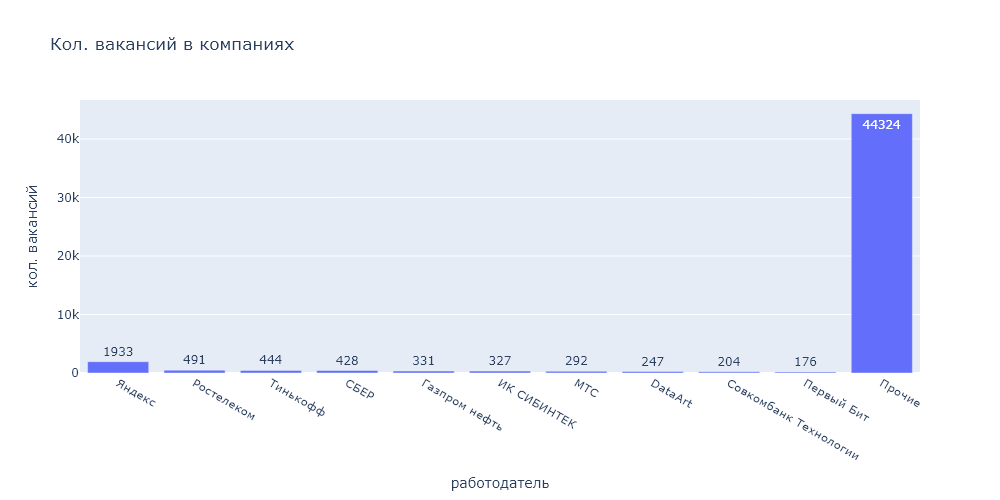

In [ ]:
# выведем столбчатую диаграмму, показывающую количество вакансий по компаниям в топ-10 и в прочих компаниях.
reply_aux_1 = pd.read_sql_query(query_aux_1, connection)
#display(reply_aux_1)
fig = px.bar(data_frame=reply_aux_1, x='работодатель', y='кол. вакансий', text ='кол. вакансий', orientation='v', title='Кол. вакансий в компаниях' )
fig.show()

2. Посчитаем как распределяются количество вакансий по компаниям в зависимости от расположения в городах-миллионниках

In [83]:
#сформируем запрос возвращающий распределение кол. вакансий дата-сайенс по компаниям и регионам.
query_aux_2 = f'''(select
            e.name "работодатель",
            a.name "города-миллионники",
            count (v.id) "кол. вакансий"
            from public.vacancies v
            left join public.employers e ON e.id=v.employer_id
            left join public.areas a ON a.id=v.area_id
            where
            (v.name ilike '%data scientist%'
            OR v.name ilike '%data science%'
            OR v.name ilike '%исследователь данных%'
            OR (v.name ilike '%ML%' AND v.name NOT ilike '%HTML%')
            OR v.name ilike '%machine learning%'
            OR v.name ilike '%машинн%обучен%')
            group by "работодатель", "города-миллионники"
            having a.name in {m_cities}
            order by 3 desc
            limit 20
)
'''

In [ ]:
#выведем график распределения кол. вакансий дата-сайенс по ТОП-20 компаниям и регионам
reply_aux_2 = pd.read_sql_query(query_aux_2, connection)
display(reply_aux_2)
reply_pivot = reply_aux_2.pivot_table(
    values='кол. вакансий',
    index='города-миллионники',
    columns='работодатель',
    fill_value=0)
display(reply_pivot)


,работодатель,города-миллионники,кол. вакансий
0,СБЕР,Москва,29
1,VK,Москва,9
2,СБЕР,Нижний Новгород,8
3,VK,Санкт-Петербург,6
4,Банк ВТБ (ПАО),Москва,6
5,МТС,Москва,6
6,inDriver,Москва,5
7,Газпромбанк,Москва,5
8,"Иннотех, Группа компаний",Москва,5
9,Яндекс,Москва,4


работодатель,Ozon,Positive Technologies,The Skolkovo Institute of Science and Technology,USETECH,VK,inDriver,АВИТО ТЕХ,Ак Барс Банк,Банк ВТБ (ПАО),Газпром нефть,Газпромбанк,"Иннотех, Группа компаний","Лента, федеральная розничная сеть",Лига Цифровой Экономики,МТС,МегаФон,СБЕР,Яндекс
города-миллионники,,,,,,,,,,,,,,,,,,
Казань,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Москва,4.0,0.0,3.0,3.0,9.0,5.0,3.0,0.0,6.0,0.0,5.0,5.0,3.0,3.0,6.0,3.0,29.0,4.0
Нижний Новгород,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
Новосибирск,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Санкт-Петербург,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


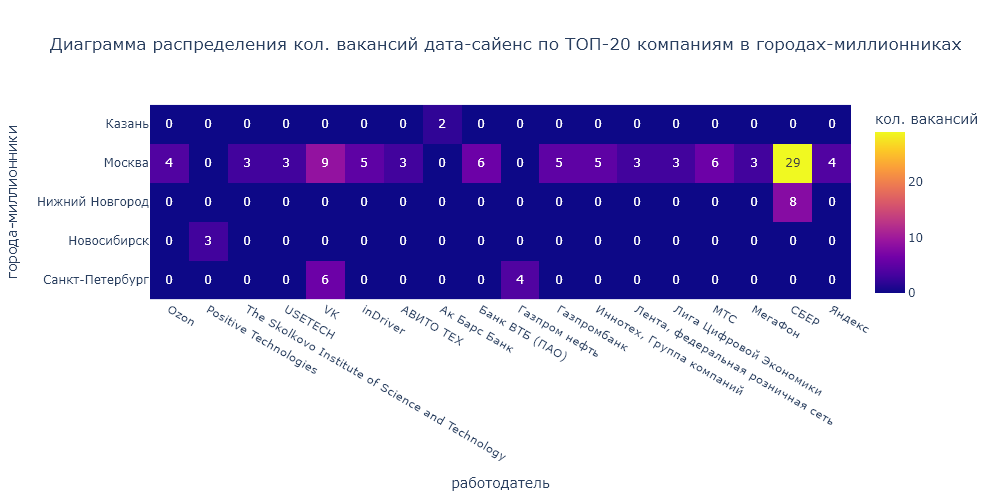

In [93]:
fig = px.imshow(reply_pivot,

                 title='Диаграмма распределения кол. вакансий дата-сайенс по ТОП-20 компаниям в городах-миллионниках',
                 labels={'color':'кол. вакансий'},
                 text_auto=True
                 )
fig.show()

In [185]:
connection.close()

***

# Общий вывод по проекту

Рынок вакансий в РФ довольно обширен. Число вакансий в базе данных - 49197 у 23501 работодателей в 294 сферах деятельности. Они представлены в 1362 регионах. По предварительному анализу на каждого работодателя приходятся в среднем примерно 2 вакансии; в каждой сфере деятельности заняты в среднем примерно 167 работатодателей; в каждом регионе в среднем примерно 36 работодателей.

Лидером по числу вакансий и охвату регионов является компания Яндекс. Предположу, что эта компания, начавшая развиваться в секторе IT как наиболее быстро развивающемся и с охватом всех цифровых продуктов, провела экспансию в сферу услуг как для конечного потребителя, так и "бизнес для бизнеса", благодаря этому заняла лидирующие позиции. У компании Яндекс есть вакансии почти во всех городах-миллионниках, наибольше количество вакансий в Москве.

Кроме сферы IT, в лидерах компании из банковской сферы и сферы коммуникаций.

Специалисты по работе с данными довольно востребованы: требуется 1771 специалист по всей стране. Для начинающих специалистов вакансий не очень много - 51. Чаще требуются специаличты уровня senior c опытом работы от 3 до 6 лет. Я предполагаю, что работатодатели выбирают из соотношения зарплата/качество. При этом ЗП специалиста с опытом увеличивается больше, чем в 3 раза по отношению к ЗП новичка без опыта. ЗП сравнительно высокие по отношению к средней по стране по остальным сферам. Специалистам без опыта предлагают в среднем 74643.0 руб., middle - 139675.0 руб., senior - 243115.0 руб. При этом специалистам дата-сайенс предъявляют много требований - в среднем 6,4 ключевых навыков.

В дата-сайенс достаточно востребованы специалисты с навыками владения языка Python и СУБД SQL или postgres.
Среди лидеров по количеству вакансий дата-сайенс по компаниям в городах-миллионниках компании СБЕР и VK.

Были обнаружены ячейки с ошибочными или незаполненными данными. В связи с этим нужно провести дальнейшее исследование по выявлению таких ячеек для удаления.

В дальнейшем можно провести сравнение базы данных по периодиским временным интервалам для выявления временных зависимостей в вакансиях и их динамику во времени.

Можно провести сбор данных по соискателяи и провести исследования этих баз данных относительно друг друга.